Imports

In [8]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from plotData import *

Loading the dataset

In [3]:
# Load dataset

dataPath = "dataset"
batchSize = 32
imgHeight = 180
imgWidth = 180

trainingDataSet = tf.keras.utils.image_dataset_from_directory(
  directory = dataPath,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

validationDataSet = tf.keras.utils.image_dataset_from_directory(
  directory = dataPath,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

classNames = trainingDataSet.class_names
print(classNames)

testDataPath = "testDataset"

testDataSet = tf.keras.utils.image_dataset_from_directory(
  directory = testDataPath,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

# Create model
numberOfClasses = len(classNames)

Found 1353 files belonging to 2 classes.
Using 1083 files for training.
Found 1353 files belonging to 2 classes.
Using 270 files for validation.
['defected', 'no_defected']
Found 204 files belonging to 2 classes.


Basic Model

In [4]:
# First Basic Model
model = Sequential([
    #layers.Rescaling(1./255, input_shape=(imgHeight, imgWidth, 3) ),
    layers.Conv2D(64, (3,3), activation="relu", input_shape=(imgHeight, imgWidth, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(numberOfClasses)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer="adam",
            metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [5]:
epochs = 15
history = model.fit(
  trainingDataSet,
  validation_data=validationDataSet,
  epochs=epochs
)

Epoch 1/15
34/34 [==============================] - 10s 136ms/step - loss: 10.9419 - accuracy: 0.7138 - val_loss: 0.6371 - val_accuracy: 0.6111
Epoch 2/15
34/34 [==============================] - 3s 88ms/step - loss: 0.2081 - accuracy: 0.9151 - val_loss: 0.1190 - val_accuracy: 0.9593
Epoch 3/15
34/34 [==============================] - 3s 83ms/step - loss: 0.0575 - accuracy: 0.9788 - val_loss: 0.0422 - val_accuracy: 0.9889
Epoch 4/15
34/34 [==============================] - 3s 84ms/step - loss: 0.0142 - accuracy: 0.9963 - val_loss: 0.0279 - val_accuracy: 0.9926
Epoch 5/15
34/34 [==============================] - 3s 89ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0327 - val_accuracy: 0.9926
Epoch 6/15
34/34 [==============================] - 3s 86ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9926
Epoch 7/15
34/34 [==============================] - 3s 83ms/step - loss: 4.7411e-04 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9926
Epoch 

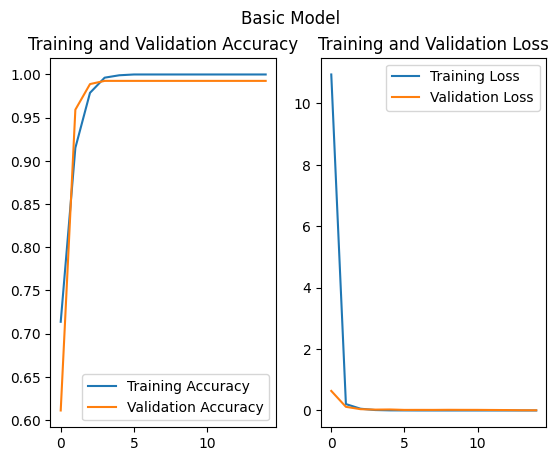

In [6]:
# Plotting data
plotData(history, epochs, "Basic Model")


Model with Data Augmentation

In [12]:
# Model with random flips, rotations and zooms on data

model = Sequential([
    #layers.Rescaling(1./255, input_shape=(imgHeight, imgWidth, 3) ),
    layers.RandomFlip("horizontal", input_shape=(imgHeight, imgWidth, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(numberOfClasses)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer="adam",
            metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)       

In [15]:
epochs = 15
history = model.fit(
  trainingDataSet,
  validation_data=validationDataSet,
  epochs=epochs
)

Epoch 1/15
34/34 [==============================] - 21s 610ms/step - loss: 0.0909 - accuracy: 0.9603 - val_loss: 0.0205 - val_accuracy: 0.9963
Epoch 2/15
34/34 [==============================] - 19s 562ms/step - loss: 0.0834 - accuracy: 0.9732 - val_loss: 0.0352 - val_accuracy: 0.9889
Epoch 3/15
34/34 [==============================] - 18s 538ms/step - loss: 0.0445 - accuracy: 0.9843 - val_loss: 0.0538 - val_accuracy: 0.9778
Epoch 4/15
34/34 [==============================] - 18s 527ms/step - loss: 0.0564 - accuracy: 0.9806 - val_loss: 0.0190 - val_accuracy: 0.9889
Epoch 5/15
34/34 [==============================] - 18s 528ms/step - loss: 0.0529 - accuracy: 0.9797 - val_loss: 0.0346 - val_accuracy: 0.9926
Epoch 6/15
34/34 [==============================] - 18s 528ms/step - loss: 0.0436 - accuracy: 0.9843 - val_loss: 0.0113 - val_accuracy: 0.9926
Epoch 7/15
34/34 [==============================] - 18s 529ms/step - loss: 0.0300 - accuracy: 0.9917 - val_loss: 0.0224 - val_accuracy: 0.9889

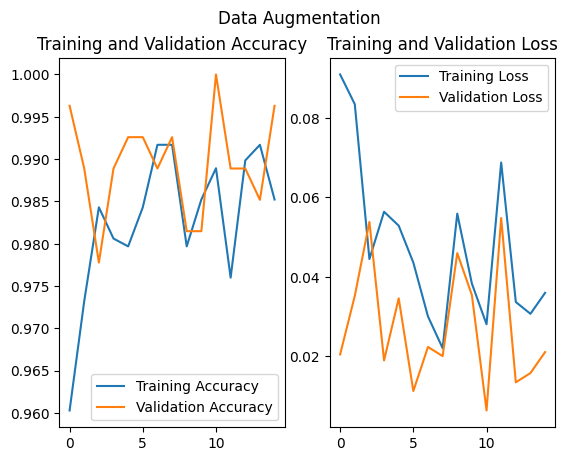

In [16]:
plotData(history, epochs, "Data Augmentation")

Model with Dropout

In [29]:
# Model with dropout

model = Sequential([
    #layers.Rescaling(1./255, input_shape=(imgHeight, imgWidth, 3) ),
    layers.RandomFlip("horizontal", input_shape=(imgHeight, imgWidth, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(numberOfClasses)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer="adam",
            metrics=["accuracy"])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_7 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_7 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_7 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 87, 87, 64)       

In [30]:
epochs = 20
history = model.fit(
  trainingDataSet,
  validation_data=validationDataSet,
  epochs=epochs
)

Epoch 1/20
34/34 [==============================] - 24s 583ms/step - loss: 7.4335 - accuracy: 0.5974 - val_loss: 0.5484 - val_accuracy: 0.6667
Epoch 2/20
34/34 [==============================] - 20s 573ms/step - loss: 0.4594 - accuracy: 0.7784 - val_loss: 0.4015 - val_accuracy: 0.7519
Epoch 3/20
34/34 [==============================] - 19s 568ms/step - loss: 0.3950 - accuracy: 0.8107 - val_loss: 0.2496 - val_accuracy: 0.9000
Epoch 4/20
34/34 [==============================] - 19s 557ms/step - loss: 0.3098 - accuracy: 0.8615 - val_loss: 0.2127 - val_accuracy: 0.9185
Epoch 5/20
34/34 [==============================] - 19s 564ms/step - loss: 0.2723 - accuracy: 0.8809 - val_loss: 0.1910 - val_accuracy: 0.9556
Epoch 6/20
34/34 [==============================] - 19s 559ms/step - loss: 0.2970 - accuracy: 0.8781 - val_loss: 0.1844 - val_accuracy: 0.9370
Epoch 7/20
34/34 [==============================] - 19s 561ms/step - loss: 0.2685 - accuracy: 0.8837 - val_loss: 0.1267 - val_accuracy: 0.9667

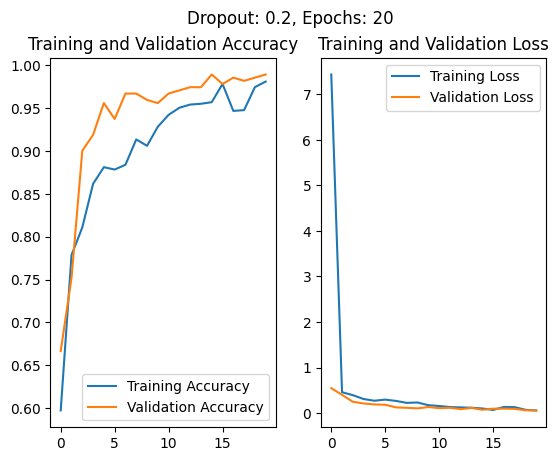

In [31]:
plotData(history, epochs, f"Dropout: {0.2}, Epochs: {epochs}")

Model with Average Pooling

In [35]:
# Model with Average Pooling

model = Sequential([
    #layers.Rescaling(1./255, input_shape=(imgHeight, imgWidth, 3) ),
    layers.RandomFlip("horizontal", input_shape=(imgHeight, imgWidth, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.AveragePooling2D(2,2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(numberOfClasses)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer="adam",
            metrics=["accuracy"])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_9 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_9 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_9 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 average_pooling2d_4 (Averag  (None, 89, 89, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_41 (Conv2D)          (None, 87, 87, 64)      

In [36]:
epochs = 20
history = model.fit(
  trainingDataSet,
  validation_data=validationDataSet,
  epochs=epochs
)

Epoch 1/20
34/34 [==============================] - 22s 513ms/step - loss: 9.3799 - accuracy: 0.6113 - val_loss: 0.4505 - val_accuracy: 0.8926
Epoch 2/20
34/34 [==============================] - 17s 503ms/step - loss: 0.5891 - accuracy: 0.7165 - val_loss: 1.2567 - val_accuracy: 0.4741
Epoch 3/20
34/34 [==============================] - 17s 504ms/step - loss: 0.4297 - accuracy: 0.7895 - val_loss: 0.3417 - val_accuracy: 0.8481
Epoch 4/20
34/34 [==============================] - 17s 501ms/step - loss: 0.3668 - accuracy: 0.8384 - val_loss: 0.4142 - val_accuracy: 0.7556
Epoch 5/20
34/34 [==============================] - 17s 500ms/step - loss: 0.3419 - accuracy: 0.8393 - val_loss: 0.3015 - val_accuracy: 0.8889
Epoch 6/20
34/34 [==============================] - 17s 499ms/step - loss: 0.3178 - accuracy: 0.8550 - val_loss: 1.8149 - val_accuracy: 0.5296
Epoch 7/20
34/34 [==============================] - 17s 502ms/step - loss: 0.2857 - accuracy: 0.8735 - val_loss: 0.4857 - val_accuracy: 0.7593

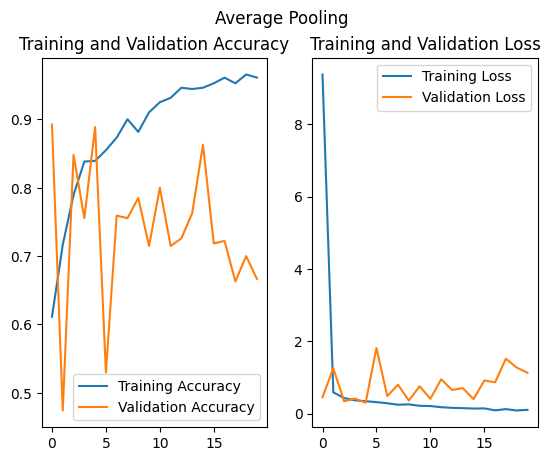

In [37]:
plotData(history, epochs, f"Average Pooling")

Model with RMSprop Optimizer

In [41]:
# Model with RMSprop optimizer

model = Sequential([
    #layers.Rescaling(1./255, input_shape=(imgHeight, imgWidth, 3) ),
    layers.RandomFlip("horizontal", input_shape=(imgHeight, imgWidth, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(numberOfClasses)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer="RMSprop",
            metrics=["accuracy"])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_11 (RandomFlip)  (None, 180, 180, 3)      0         
                                                                 
 random_rotation_11 (RandomR  (None, 180, 180, 3)      0         
 otation)                                                        
                                                                 
 random_zoom_11 (RandomZoom)  (None, 180, 180, 3)      0         
                                                                 
 conv2d_48 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 87, 87, 64)      

In [42]:
epochs = 20
history = model.fit(
  trainingDataSet,
  validation_data=validationDataSet,
  epochs=epochs
)

Epoch 1/20
34/34 [==============================] - 22s 542ms/step - loss: 98.1407 - accuracy: 0.6223 - val_loss: 0.6321 - val_accuracy: 0.6444
Epoch 2/20
34/34 [==============================] - 19s 553ms/step - loss: 1.0349 - accuracy: 0.6657 - val_loss: 0.4327 - val_accuracy: 0.8111
Epoch 3/20
34/34 [==============================] - 18s 532ms/step - loss: 0.9626 - accuracy: 0.7184 - val_loss: 0.5964 - val_accuracy: 0.6963
Epoch 4/20
34/34 [==============================] - 18s 522ms/step - loss: 0.5845 - accuracy: 0.7295 - val_loss: 0.3517 - val_accuracy: 0.8778
Epoch 5/20
34/34 [==============================] - 18s 516ms/step - loss: 0.7441 - accuracy: 0.7535 - val_loss: 0.4193 - val_accuracy: 0.8963
Epoch 6/20
34/34 [==============================] - 19s 559ms/step - loss: 0.5092 - accuracy: 0.7941 - val_loss: 0.2555 - val_accuracy: 0.8852
Epoch 7/20
34/34 [==============================] - 18s 535ms/step - loss: 0.4253 - accuracy: 0.8153 - val_loss: 0.2910 - val_accuracy: 0.877

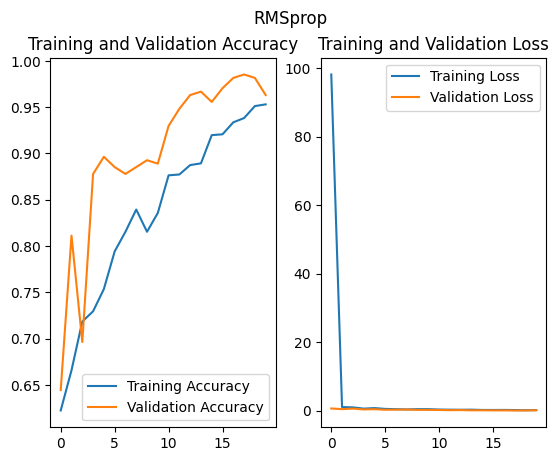

In [44]:
plotData(history, epochs, f"RMSprop")

Final Model

In [59]:
# Final model

model = Sequential([
    layers.RandomFlip("horizontal", input_shape=(imgHeight, imgWidth, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(numberOfClasses, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer="adam",
            metrics=["accuracy"])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_15 (RandomFlip)  (None, 180, 180, 3)      0         
                                                                 
 random_rotation_15 (RandomR  (None, 180, 180, 3)      0         
 otation)                                                        
                                                                 
 random_zoom_15 (RandomZoom)  (None, 180, 180, 3)      0         
                                                                 
 conv2d_66 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 87, 87, 64)      

In [60]:
epochs = 20
history = model.fit(
  trainingDataSet,
  validation_data=validationDataSet,
  epochs=epochs
)

Epoch 1/20


c:\Users\Benjy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


34/34 [==============================] - 24s 592ms/step - loss: 3.7473 - accuracy: 0.6030 - val_loss: 0.5325 - val_accuracy: 0.7556
Epoch 2/20
34/34 [==============================] - 19s 548ms/step - loss: 0.5850 - accuracy: 0.6953 - val_loss: 0.3920 - val_accuracy: 0.8370
Epoch 3/20
34/34 [==============================] - 19s 566ms/step - loss: 0.5298 - accuracy: 0.7258 - val_loss: 0.3661 - val_accuracy: 0.8593
Epoch 4/20
34/34 [==============================] - 19s 552ms/step - loss: 0.4696 - accuracy: 0.7839 - val_loss: 0.3707 - val_accuracy: 0.8037
Epoch 5/20
34/34 [==============================] - 19s 548ms/step - loss: 0.4491 - accuracy: 0.7886 - val_loss: 0.3069 - val_accuracy: 0.9259
Epoch 6/20
34/34 [==============================] - 19s 555ms/step - loss: 0.4047 - accuracy: 0.8153 - val_loss: 0.2951 - val_accuracy: 0.9074
Epoch 7/20
34/34 [==============================] - 19s 547ms/step - loss: 0.3291 - accuracy: 0.8661 - val_loss: 0.2166 - val_accuracy: 0.9630
Epoch 8/20

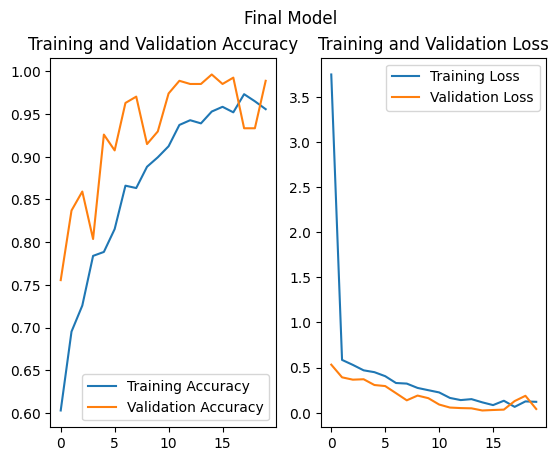

In [61]:
plotData(history, epochs, f"Final Model")

Evaluation of Final Model

In [64]:
model.evaluate(testDataSet)


7/7 [==============================] - 0s 31ms/step - loss: 0.0243 - accuracy: 0.9951


[0.024328812956809998, 0.9950980544090271]